In [1]:
import matplotlib.pyplot as plt
import numpy as np
# from skopt import gp_minimize

In [2]:
from a_star import A_Star
from assignment import AssignmentGame, test_assignment_env, test_assignment_game, AssignmentEnv
import pstats
import cProfile
from timeit import timeit
import pickle

# def f():
#     game = AssignmentGame(
#             Q=300,
#             grid_size=45,
#             max_capacity=125
#         )
#     game.reset(num_packages = 500)
#     res = A_Star(game, 10)
game50 = AssignmentGame(
        Q=0,
        K = 50,
        grid_size=25,
        max_capacity=15
    )

game75 = AssignmentGame(
        Q=0,
        K = 75,
        grid_size=25,
        max_capacity=20
    )

game100 = AssignmentGame(
        Q=0,
        K = 100,
        grid_size=25,
        max_capacity=25
    )



In [3]:
def compare_limit_times(game : AssignmentGame, times = range(1, 11)):
    game.reset()
    costs = np.zeros(len(times))
    for time in times:
        r, *_ = game.step(
            np.ones(game.num_packages, int),
            time_budget=time
        )
        costs[time-1] = -r
    return costs
    

In [11]:
with open('res_compare_ORtimes_50_75_100_n50.pkl', 'rb') as f:
    res = pickle.load(f)

In [12]:
times50 = res['res50'].pop('times')
times75 = res['res75'].pop('times')
times100 = res['res100'].pop('times')

range(1, 11)


In [13]:
costs50 = np.array(
    [e for e in res['res50'].values()]
)

costs75 = np.array(
    [e for e in res['res75'].values()]
)

costs100 = np.array(
    [e for e in res['res100'].values()]
)

(10,)


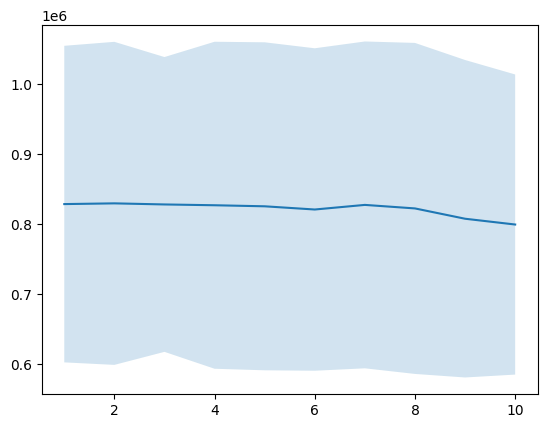

In [15]:
mean = np.mean(costs50, axis=0)
std = np.std(costs50, axis=0)
print(mean.shape)
plt.plot(times50, mean)
plt.fill_between(times50, mean - 2*std, mean + 2*std, alpha=0.2)

(15,)


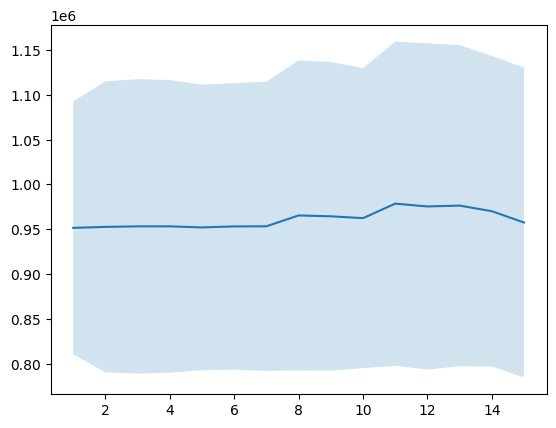

In [16]:
costs = costs75
times = times75
mean = np.mean(costs, axis=0)
std = np.std(costs, axis=0)
print(mean.shape)
plt.plot(times, mean)
plt.fill_between(times, mean - 2*std, mean + 2*std, alpha=0.2)

(10,)


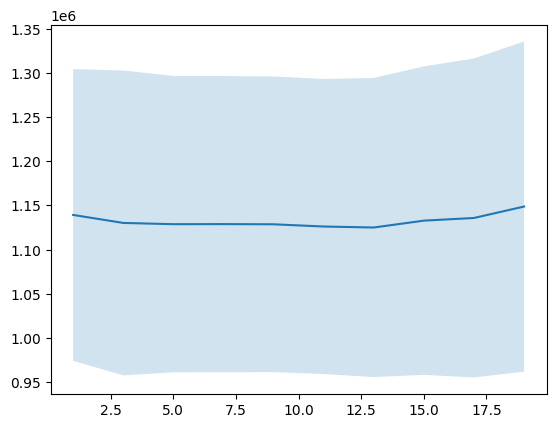

In [19]:
costs = costs100
times = times100
mean = np.mean(costs, axis=0)
std = np.std(costs, axis=0)
print(mean.shape)
plt.plot(times, mean)
plt.fill_between(times, mean - 2*std, mean + 2*std, alpha=0.2)

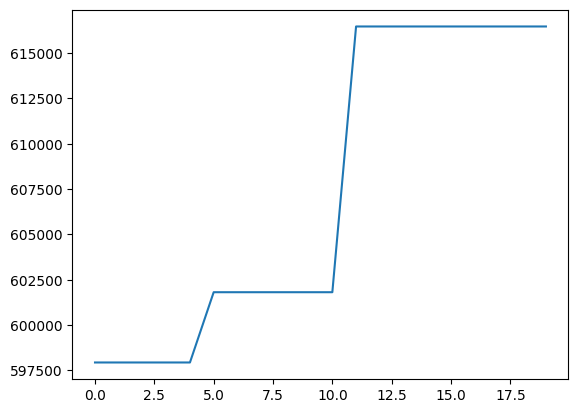

In [7]:
costs100 = compare_limit_times(game100, times=range(1, 21))

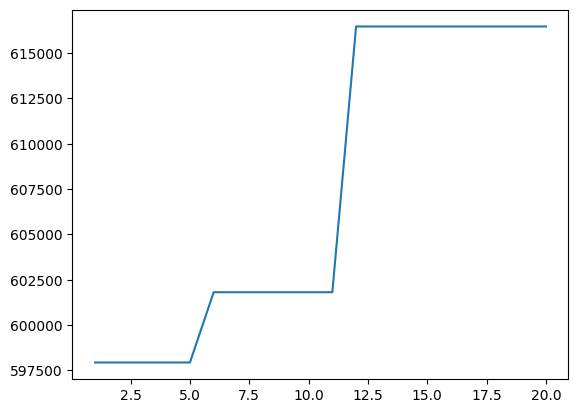

In [14]:
plt.plot(range(1, 21), costs100)

In [12]:
import numpy as np
a = np.ones(10)
a[np.arange(5, dtype=int)] = np.zeros(5)
a

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [6]:
import pickle

fileObject = "game"
with open('game.pkl','wb') as f:
    pickle.dump(game, f)
#...
with open('game.pkl','rb') as f:
    game = pickle.load(f)
game.reset()

{}

In [2]:
%%timeit
test_assignment_env(game, log = False)

2.31 s ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
%%timeit
test_assignment_game(game, log = False)

2.74 s ± 24.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
cProfile.run("test_assignment_env(log = False)", "my_func_stats")

p = pstats.Stats("my_func_stats")
p.sort_stats("cumulative").print_stats()

Tue Oct 17 19:55:26 2023    my_func_stats

         6565883 function calls (6565845 primitive calls) in 19.162 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   19.162   19.162 {built-in method builtins.exec}
        1    0.003    0.003   19.162   19.162 <string>:1(<module>)
        1    0.001    0.001   19.159   19.159 /Users/faridounet/PhD/TransportersDilemma/assignment.py:583(test_assignment_env)
        1    0.005    0.005   16.806   16.806 /Users/faridounet/PhD/TransportersDilemma/assignment.py:20(__init__)
        1   16.751   16.751   16.759   16.759 /opt/homebrew/lib/python3.10/site-packages/networkx/algorithms/shortest_paths/dense.py:13(floyd_warshall_numpy)
      500    1.221    0.002    1.286    0.003 /Users/faridounet/PhD/TransportersDilemma/assignment.py:518(step)
        1    0.000    0.000    1.065    1.065 /Users/faridounet/PhD/TransportersDilemma/assignment.py:487(reset)
      

In [28]:
from numba import jit, njit
import numpy as np
from timeit import timeit

@jit
def f(l, x, mask):
    y = x[mask]
    s = 0
    for i in range(len(l)):
        s += y[i]
        

def ff(l, x, mask):
    y = x[mask]
    s = 0
    for i in range(len(l)-1):
        s += y[i]

In [29]:
%%timeit
x = np.random.rand(200)
l = np.random.randint(20, size=50)
mask = np.where(x<.5)
ff(l, x, mask)

9.34 µs ± 50.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [31]:
%%timeit
x = np.random.rand(200)
l = np.random.randint(20, size=50)
mask = np.where(x<.5)
f(l, x, mask)

6.35 µs ± 12.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [2]:
# res = gp_minimize(loss_fn,                  # the function to minimize
#                   [[0,1] for _ in range(len(dims))],      # the bounds on each dimension of x
#                   acq_func="EI",      # the acquisition function
#                   n_calls=150,         # the number of evaluations of f
#                   n_random_starts=3,  # the number of random initialization points
#                   noise=0.1**2,       # the noise level (optional)
#                   n_jobs=5,
#                   random_state=1234)   # the random seed

In [15]:
actions = np.array([1, 0, 1, 0, 1])

distance = np.zeros(4)
time = np.zeros(4)

solutions = [
    [0, 1, 0],
    [0, 2, 0],
    [0, 3, 0],
    [0, 4, 5, 0]
]

distance_matrix = np.ones(len(actions)+1) - np.eye(6)

omitted_packages = np.where(actions == 0)[0] + 1 # important to add 1 to ignore the hub's index 0
sol = [
    [
        solutions[m][i]
        for i in range(len(solutions[m]))
        if solutions[m][i] not in omitted_packages
    ]
    for m in range(len(solutions))
]
print(sol)

for m in range(len(solutions)):
    i = 0
    j = 1
    while i < len(solutions[m]) and j < len(solutions[m]):
        if not solutions[m][j] in omitted_packages:
            distance[m] += distance_matrix[solutions[m][i], solutions[m][j]]
            i = j
            j = i+1
        else:
            j += 1
        # print(j)
print(distance)

[[0, 1, 0], [0, 0], [0, 3, 0], [0, 5, 0]]
[2. 0. 2. 2.]


In [4]:
a = np.array([1, 0, 1, 0, 9])
a[np.nonzero(a)[0]]
# np.where(a == 1)

array([1, 1, 9])

In [4]:
from assignment import AssignmentGame
# e = 2*[0] + 2*[0.15] + 6*[0.3]
# c = [1 for _ in range(10)]
Q = 30
game = AssignmentGame(Q=Q)#grid_size=30, max_capacity=50, emissions_KM=e, costs_KM=c, Q=Q)
K = 50
game.reset(num_packages = K)
game.step(np.ones(K, dtype=int))

(-2511.9999999999973,
 False,
 {'solution_found': True,
  'costs': 712.0,
  'time_per_vehicle': array([1.075, 1.45 , 1.225, 0.7  ]),
  'distance_per_vehicle': array([43., 58., 49., 28.]),
  'excess_emission': 1.7999999999999972,
  'omitted': 0,
  'solution': [[0, 39, 5, 6, 22, 47, 44, 27, 20, 10, 37, 11, 15, 24, 35, 0],
   [0, 50, 4, 7, 34, 36, 43, 31, 14, 9, 13, 12, 3, 30, 29, 0],
   [0, 40, 26, 38, 21, 16, 49, 41, 28, 32, 45, 48, 33, 19, 0],
   [0, 17, 23, 2, 18, 8, 1, 25, 42, 46, 0]]})

In [5]:
f = lambda x : -game.step(x, call_OR=False)[0]
res = gp_minimize(f,                  # the function to minimize
                  [[0,1] for _ in range(K)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=200,         # the number of evaluations of f
                  n_random_starts=3,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  n_jobs=5,
                  x0=[1 for _ in range(K)],#np.ones(K, dtype = int),
                  random_state=1234)   # the random seed

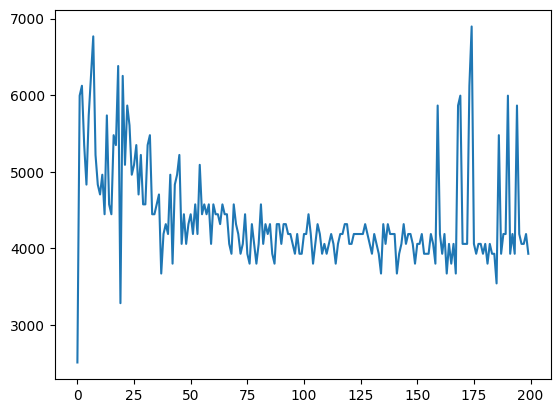

In [6]:
plt.plot(res['func_vals'])

In [46]:
np.argmin(res['func_vals'])

177

In [ ]:
import numpy.random as rd
def rand_neighbor(solution : np.ndarray, nb_changes = 1) :
    """
    Generates new random solution.
    :param solution: the solution for which we search a neighbor
    :param nb_changes: maximum number of the changes alowed
    :return: returns a random neighbor for the solution
    """
    new_solution = solution.astype(bool)
    i = rd.choice(len(new_solution), nb_changes, replace=False)
    new_solution[i] = ~new_solution[i]
    return new_solution.astype(int)

def recuit(loss_fn, T_init, T_limit, lamb = .99, var = False, id = 0, log = True, H = 500) :
    """
    This function finds a solution for the steiner problem
        using annealing algorithm
    :param game: the assignment game
    :param T_init: the initial temperature
    :param T_limit: the lowest temperature allowed
    :return: the solution found and the evolution of the best evaluations
    """
    best = np.ones(len(dims), dtype=int)
    solution = best.copy()
    T = T_init
    eval_best = loss_fn(solution)
    eval_solution = eval_best
    m = 0
    list_best_costs = [eval_best]
    flag100 = True

    while(T>T_limit):
        sol = rand_neighbor(solution)
        eval_sol = loss_fn(sol)
        
        if m%20 == 0 and log:
            print(20*'-')
            print(m)
            print('- searcher ', id)
            print('temperature : ', T)
            print('cost : ', eval_sol)
            print('best cost : ', eval_best)
        if eval_sol < eval_best :
            best = sol.copy()
            eval_best = eval_sol
            
        if eval_sol < eval_solution :
            prob = 1
        else :
            prob = np.exp((eval_best - eval_sol)/T)
        rand = rd.random()
        if rand <= prob :
            solution = sol
            eval_solution = eval_sol
        list_best_costs.append(eval_best)
        T *= lamb
        m += 1
        if m >= H:
            break
        
        if(var and flag100 and T<=100):
            flag100 = False
            lamb = .999
        #print(T)

    print(f'm ={m}')
    print(eval_best)
    return best, list_best_costs


In [ ]:
best = recuit(f, 20000, 2, )